In [4]:
#source_folder = "\\input\\"
#import splitfolders  # or import split_folders
# set 400 aside for validation
#splitfolders.fixed(source_folder, output= "output", seed=13, fixed=(400), oversample=False, group_prefix=None) # default values

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from keras.utils import np_utils

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import keras.optimizers


img_width, img_height = 240,320
path_train_img = 'C:\\Users\Anne\\Documents\\GIT\\Cozmo\\01_Collect_Images\\output\\train\\'
path_validation_img = 'C:\\Users\\Anne\\Documents\\GIT\\Cozmo\\01_Collect_Images\\output\\val\\'

epochs = 100
batch_size = 30

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(240,320,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

train_img = ImageDataGenerator(rescale=1./255,shear_range=0.2, zoom_range=0.2,horizontal_flip=True)

test_img = ImageDataGenerator(rescale=1./255)

train_generator = train_img.flow_from_directory(path_train_img,target_size=(img_width, img_height), 
                                                batch_size=batch_size,class_mode='categorical')

validation_generator = test_img.flow_from_directory(path_validation_img,target_size=(img_width, img_height),
                                                    batch_size=batch_size, class_mode='categorical')


Found 6352 images belonging to 4 classes.
Found 1600 images belonging to 4 classes.


In [6]:
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator)

Epoch 1/100
212/212 [==============================] - 248s 1s/step - loss: 0.8248 - accuracy: 0.7206 - val_loss: 0.1238 - val_accuracy: 0.9625
Epoch 2/100
212/212 [==============================] - 246s 1s/step - loss: 0.2549 - accuracy: 0.9196 - val_loss: 0.0970 - val_accuracy: 0.9762
Epoch 3/100
212/212 [==============================] - 246s 1s/step - loss: 0.1495 - accuracy: 0.9564 - val_loss: 0.0300 - val_accuracy: 0.9894
Epoch 4/100
212/212 [==============================] - 249s 1s/step - loss: 0.1030 - accuracy: 0.9709 - val_loss: 0.0439 - val_accuracy: 0.9894
Epoch 5/100
212/212 [==============================] - 249s 1s/step - loss: 0.0855 - accuracy: 0.9791 - val_loss: 0.0073 - val_accuracy: 0.9962
Epoch 6/100
212/212 [==============================] - 250s 1s/step - loss: 0.0713 - accuracy: 0.9795 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 7/100
212/212 [==============================] - 250s 1s/step - loss: 0.0698 - accuracy: 0.9810 - val_loss: 0.0042 - val_accuracy:

Epoch 57/100
212/212 [==============================] - 243s 1s/step - loss: 0.0536 - accuracy: 0.9951 - val_loss: 5.2502e-06 - val_accuracy: 1.0000
Epoch 58/100
212/212 [==============================] - 243s 1s/step - loss: 0.0733 - accuracy: 0.9948 - val_loss: 1.2619e-06 - val_accuracy: 1.0000
Epoch 59/100
212/212 [==============================] - 243s 1s/step - loss: 0.0387 - accuracy: 0.9940 - val_loss: 2.2063e-06 - val_accuracy: 1.0000
Epoch 60/100
212/212 [==============================] - 243s 1s/step - loss: 0.0618 - accuracy: 0.9928 - val_loss: 3.0619e-07 - val_accuracy: 1.0000
Epoch 61/100
212/212 [==============================] - 243s 1s/step - loss: 0.0469 - accuracy: 0.9948 - val_loss: 7.5660e-04 - val_accuracy: 1.0000
Epoch 62/100
212/212 [==============================] - 243s 1s/step - loss: 0.0268 - accuracy: 0.9950 - val_loss: 1.2666e-09 - val_accuracy: 1.0000
Epoch 63/100
212/212 [==============================] - 243s 1s/step - loss: 0.0311 - accuracy: 0.9957 - v

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 238, 318, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 238, 318, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 119, 159, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 117, 157, 32)      9248      
_________________________________________________________________
activation_6 (Activation)    (None, 117, 157, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 58, 78, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 76, 64)       

In [8]:
model.save('C:\\Users\\Anne\\Documents\\GIT\\Cozmo\\02_Model\\MyModelhebehshuffled')
model.save_weights('model_weights_shuffle.h5')
model.save('model_keras_shuffle.h5')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: C:\Users\Anne\Documents\GIT\Cozmo\02_Model\MyModelhebehshuffled\assets


INFO:tensorflow:Assets written to: C:\Users\Anne\Documents\GIT\Cozmo\02_Model\MyModelhebehshuffled\assets


In [9]:
# Final evaluation of the model
scores = model.evaluate(validation_generator, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 100.00%


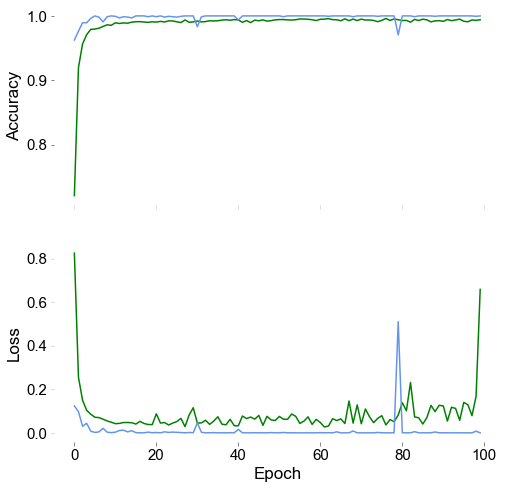

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# from IPython.display import Inline


fig, (ax1,ax2) = plt.subplots(2,1,figsize=[8,8], sharex=True)

ax1.plot(history.history['accuracy'], color='green')
ax1.plot(history.history['val_accuracy'], color='cornflowerblue')
ax1.set_ylabel('Accuracy', fontsize=17)
#ax1.set_xlabel('Epoch', fontsize=17)
ax2.plot(history.history['loss'], color='green')
ax2.plot(history.history['val_loss'], color='cornflowerblue')
ax2.set_ylabel('Loss', fontsize=17)
ax2.set_xlabel('Epoch', fontsize=17)
#ax1.legend(['train', 'test'], loc='upper left')
#ax2.legend(['train', 'test'], loc='upper left')
sns.despine(top=True,bottom=True,right=True,left=True)
sns.set(style='white',rc={"lines.linewidth": 3})
ax1.tick_params(axis='y', labelsize=15, color='dimgrey')
ax1.tick_params(axis='x', labelsize=15, color='lightgrey')
ax2.tick_params(axis='x', labelsize=15, color='dimgrey')
ax2.tick_params(axis='y', labelsize=15, color='lightgrey')


fig.savefig('Model_Metrics_NoCallbacks_Aftershuffle.jpeg', bbox_inches='tight')

plt.show()

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(validation_generator, 7952 // 30+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['C','M','O','Z']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[106  99  94 101]
 [ 93  92 114 101]
 [108 105 101  86]
 [ 93 104  91 112]]
Classification Report
              precision    recall  f1-score   support

           C       0.27      0.27      0.27       400
           M       0.23      0.23      0.23       400
           O       0.25      0.25      0.25       400
           Z       0.28      0.28      0.28       400

    accuracy                           0.26      1600
   macro avg       0.26      0.26      0.26      1600
weighted avg       0.26      0.26      0.26      1600



<AxesSubplot:>

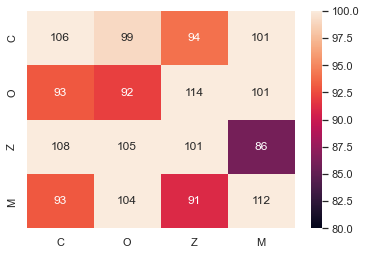

In [27]:
cf_matrix = confusion_matrix(validation_generator.classes, y_pred)
import seaborn as sns
x_axis_labels = ['C','O','Z','M']
y_axis_labels = ['C','O','Z','M']
sns.heatmap(cf_matrix, annot=True, fmt="0", xticklabels=x_axis_labels, yticklabels=y_axis_labels,  vmin=80, vmax=100)